# Data Download and Exploration

This code means that the notebook will re-import your source code in `src` when it is edited (the default is not to re-import, because most modules are assumed not to change over time).  It's a good idea to include it in any exploratory notebook that uses `src` code

In [24]:
%load_ext autoreload
%autoreload 2

This snippet allows the notebook to import from the `src` module.  The directory structure looks like:

```
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering)
│   │                     followed by the topic of the notebook, e.g.
│   │                     01_data_collection_exploration.ipynb
│   └── exploratory    <- Raw, flow-of-consciousness, work-in-progress notebooks
│   └── report         <- Final summary notebook(s)
│
├── src                <- Source code for use in this project
│   ├── data           <- Scripts to download and query data
│   │   ├── sql        <- SQL scripts. Naming convention is a number (for ordering)
│   │   │                 followed by the topic of the script, e.g.
│   │   │                 03_create_pums_2017_table.sql
│   │   ├── data_collection.py
│   │   └── sql_utils.py
```

So we need to go up two "pardir"s (parent directories) to import the `src` code from this notebook.  You'll want to include this code at the top of any notebook that uses the `src` code.

In [25]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The code to download all of the data and load it into a SQL database is in the `data` module within the `src` module.  You'll only need to run `download_data_and_load_into_sql` one time for the duration of the project.

In [26]:
from src.data import data_collection

This line may take as long as 10-20 minutes depending on your network connection and computer specs

In [27]:
data_collection.download_data_and_load_into_sql()

DuplicateDatabase: database "opportunity_youth" already exists


Now it's time to explore the data!

In [209]:
import psycopg2
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
pd.set_option('max_colwidth', 80)

In [179]:
DBNAME = "opportunity_youth"

In [180]:
conn = psycopg2.connect(dbname=DBNAME)

In [181]:
df = gp.read_file('tl_2017_53_puma10/tl_2017_53_puma10.shp')
# df2_1 = df[(df['PUMACE10'] == '11610') | (df['PUMACE10'] == '11611') | (df['PUMACE10'] == '11612') |\
#          (df['PUMACE10'] == '11613') | (df['PUMACE10'] == '11614') | (df['PUMACE10'] == '11615')]

lst = [str(num) for num in range(11610, 11616)]
df["s_kc"] = df['PUMACE10'].isin(lst)

df.head(3)

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,s_kc
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.64528, -122.43347 48.64529, -12...",False
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.00230, -122.40490 49.00230, -12...",False
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counties PUMA",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.88678, -118.14962 47.88688, -11...",False


In [182]:
# df3 = df[df['NAMELSAD10'].str.contains("King|Seattle")==True]
df["kc"] = df['NAMELSAD10'].str.contains("King|Seattle")

In [183]:
# df[df['NAMELSAD10'].str.contains('King', regex=False)].count()

In [184]:
df.head(3)

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,s_kc,kc
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.64528, -122.43347 48.64529, -12...",False,False
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.00230, -122.40490 49.00230, -12...",False,False
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counties PUMA",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.88678, -118.14962 47.88688, -11...",False,False


In [185]:
# df[df['NAMELSAD10'].str.contains('Seattle')].count()

In [186]:
# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))
# plt.show()

In [187]:
# plt.title('King County within Washington state')
# plt.legend((df['kc'],df[df['kc']==False]), ('King County','Washington state (excluding King County)'))
# plt.show()

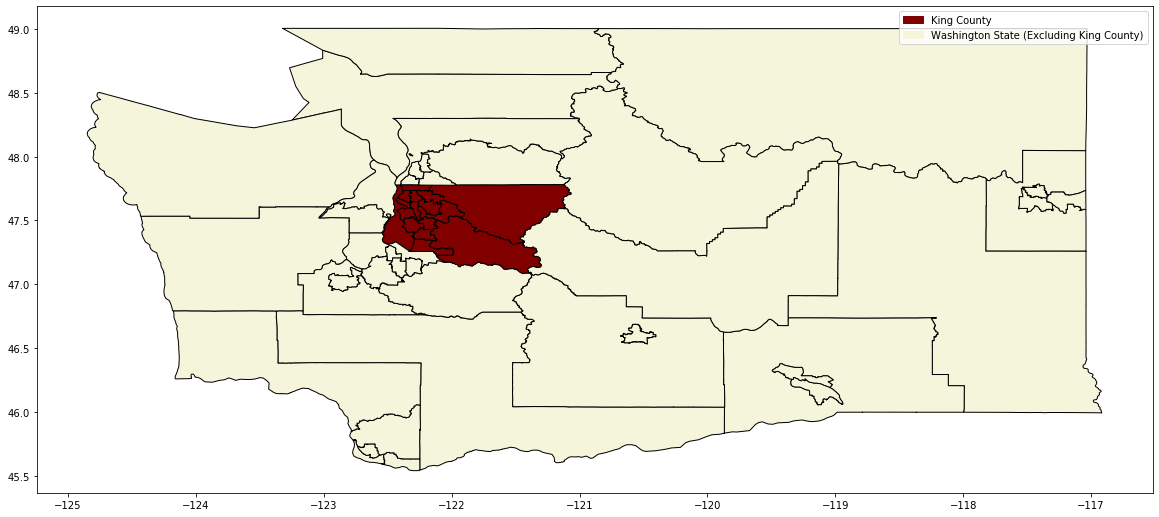

In [213]:
fig, ax = plt.subplots(figsize=(20,10))
kc_patch = mpatches.Patch(color='maroon', label='King County')
non_kc_patch = mpatches.Patch(color='beige', label='Washington State (Excluding King County)')
ax.legend(handles=[kc_patch, non_kc_patch])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["beige", "maroon"])
# frame1.axes.get_xaxis().set_visible(False)
# frame1.axes.get_yaxis().set_visible(False)
df.plot(ax=ax, column='kc', edgecolor='black', cmap=cmap)

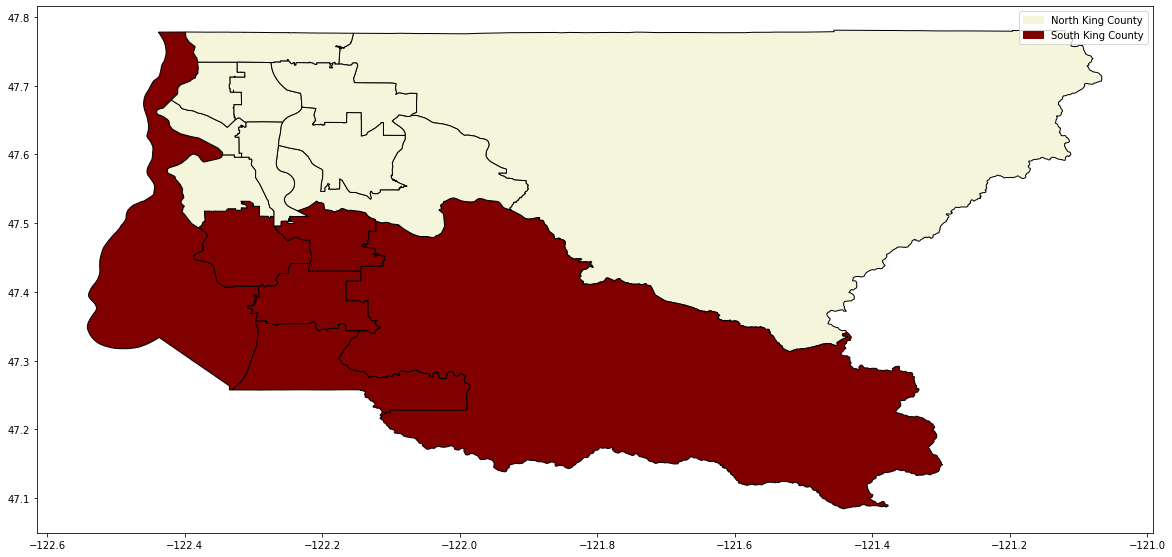

In [223]:
fig, ax = plt.subplots(figsize=(20,10))
n_kc_patch = mpatches.Patch(color='beige', label='North King County')
s_kc_patch = mpatches.Patch(color='maroon', label='South King County')
ax.legend(handles=[n_kc_patch, s_kc_patch])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["beige", "maroon"])
df[df['kc']==True].plot(ax=ax, column='s_kc', edgecolor='black', cmap=cmap)

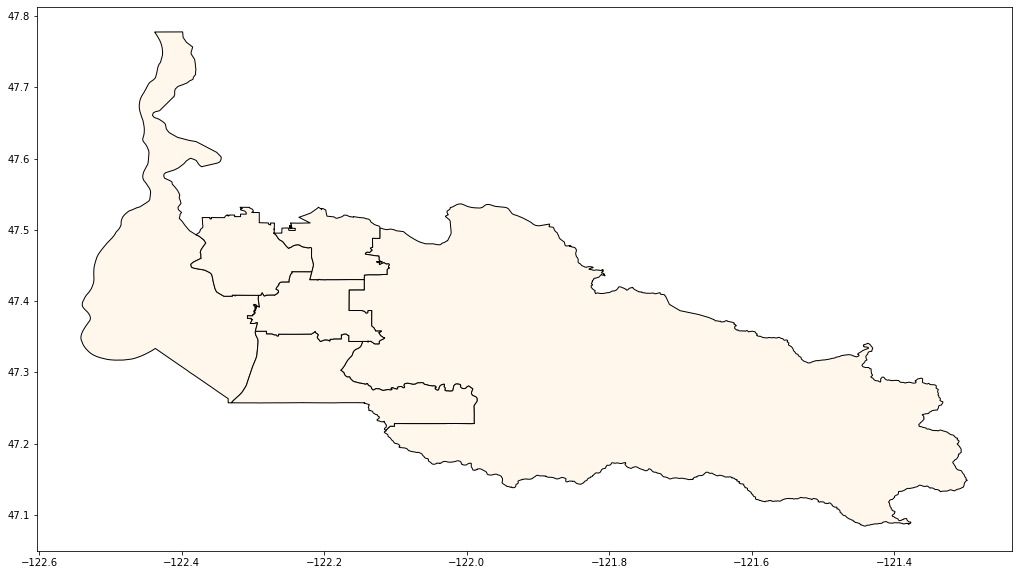

In [224]:
# df[df['kc']==True].plot(figsize=(20,10), column='s_kc', edgecolor='black', cmap='OrRd', legend=True)
df[df['s_kc']==True].plot(figsize=(20,10), column='s_kc', edgecolor='black', cmap='OrRd')

Notice the `LIMIT 10` above.  These tables have a large amount of data in them and **your goal is to use SQL to create your main query, not Pandas**.  Pandas can technically do everything that you need to do, but it will be much slower and more inefficient.  Nevertheless, Pandas is still a useful tool for exploring the data and getting a basic sense of what you're looking at.

Make sure you close the DB connection when you are done using it

In [14]:
conn.close()